In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Load CIFAR-10
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalisasi
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Split train jadi train + validation (4:1)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

print("Train:", x_train.shape)
print("Validation:", x_val.shape)
print("Test:", x_test.shape)

Train: (40000, 32, 32, 3)
Validation: (10000, 32, 32, 3)
Test: (10000, 32, 32, 3)


In [21]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.AveragePooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.AveragePooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.AveragePooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [23]:
def train_model(model):
    history = model.fit(
        x_train, y_train,
        epochs=20,
        validation_data=(x_val, y_val),
        batch_size=64,
        verbose = 1
    )
    return history

In [24]:
history1 = train_model(model1)
history2 = train_model(model2)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.2881 - loss: 1.8962 - val_accuracy: 0.4896 - val_loss: 1.3879
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.5165 - loss: 1.3423 - val_accuracy: 0.5697 - val_loss: 1.2012
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.5864 - loss: 1.1651 - val_accuracy: 0.6031 - val_loss: 1.1167
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.6289 - loss: 1.0457 - val_accuracy: 0.6319 - val_loss: 1.0398
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.6609 - loss: 0.9523 - val_accuracy: 0.6492 - val_loss: 0.9948
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.6948 - loss: 0.8655 - val_accuracy: 0.6708 - val_loss: 0.9488
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.7224 - loss: 0.7940 - val_accuracy: 0.6629 - val_loss: 0.9648
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.7440 - loss: 0.7235 - 

In [25]:
# Prediksi test set
def predict_with(model):

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Flatten label test karena aslinya (10000,1)
    y_test_flat = y_test.flatten()

    # Hitung Macro F1
    macro_f1 = f1_score(y_test_flat, y_pred_classes, average='macro')
    print("Macro F1-Score on Test Set:", macro_f1)

In [26]:
predict_with(model1)
predict_with(model2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Macro F1-Score on Test Set: 0.6911504232913771
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Macro F1-Score on Test Set: 0.7295960722920937


In [27]:
import matplotlib.pyplot as plt

def plot_loss_histories(histories, labels):
    """Membuat grafik training dan validation loss dari beberapa riwayat pelatihan.

    Args:
        histories (list): Daftar objek History (hasil dari model.fit).
        labels (list): Daftar label yang sesuai untuk setiap riwayat.

    Returns:
        None (menampilkan grafik)
    """

    # Grafik Training Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, grafik pertama
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=label)
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Grafik Validation Loss
    plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, grafik kedua
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=label)
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
    plt.show()

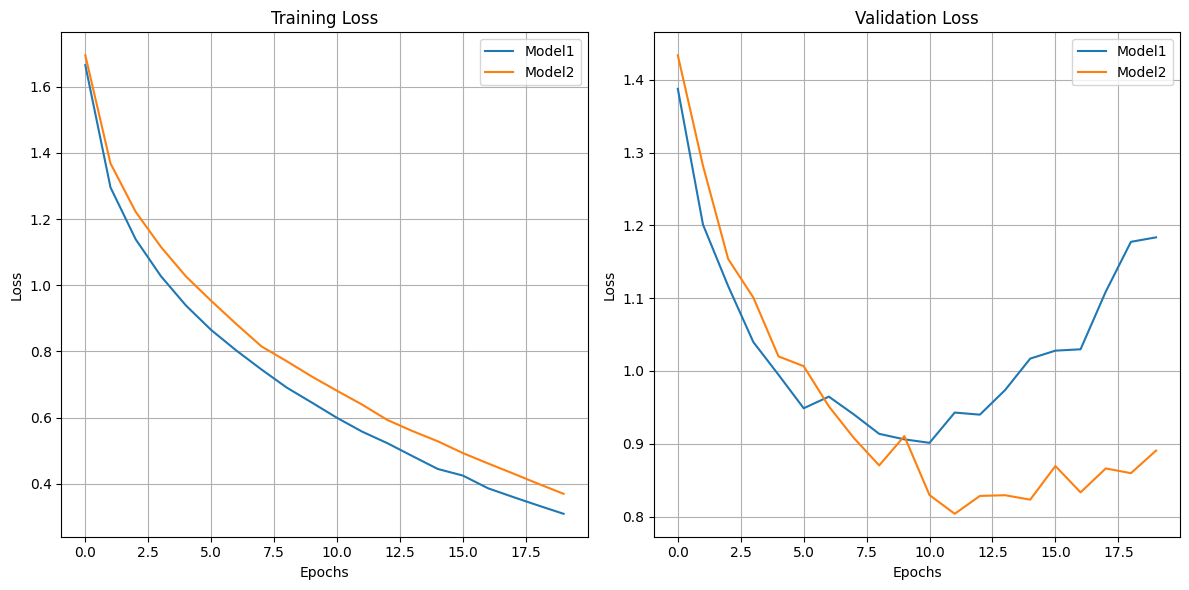

In [28]:
plot_loss_histories([history1,history2],['Model1','Model2','Model3'])